# Telco Customer Churn - Data Cleaning

## Project Overview
This notebook performs comprehensive data cleaning on the Telco Customer Churn dataset in preparation for machine learning analysis.

## Data Cleaning Steps
1. Load and inspect the dataset
2. Check for missing values
3. Fix data type issues (especially TotalCharges)
4. Handle missing values appropriately
5. Check for duplicate rows
6. Examine categorical variables for inconsistencies
7. Detect and assess outliers in numerical variables
8. Verify key variables (Contract and Churn) for analysis
9. Save the cleaned dataset

## Dataset Information
- **Target Variable**: Churn (Yes/No)
- **Key Predictor**: Contract (Month-to-month, One year, Two year)
- **Services**: Phone, Internet, Security, Backup, Protection, Support, Streaming
- **Account Info**: Tenure, Payment method, Billing, Charges
- **Demographics**: Gender, Age (SeniorCitizen), Partner, Dependents


In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)



In [40]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First 5 rows:")
print(df.head())


Dataset Shape: (7043, 21)

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract 

In [41]:
# Check data types and info
print("Data Types and Non-Null Counts:")
print(df.info())
print("\n" + "="*80)
print("\nColumn Names:")
print(df.columns.tolist())


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

In [42]:
# Check for missing values
print("Missing Values Count:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")
    
print("\n" + "="*80)
print("\nPercentage of Missing Values:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])


Missing Values Count:
Series([], dtype: int64)
No missing values found!


Percentage of Missing Values:
Series([], dtype: float64)


In [43]:
# Check for whitespace or empty string values in TotalCharges
# This is a common issue in this dataset
print("Checking TotalCharges column for empty/whitespace values...")
print(f"Data type of TotalCharges: {df['TotalCharges'].dtype}")

# Check for empty strings or whitespace
empty_total_charges = df[df['TotalCharges'].astype(str).str.strip() == '']
print(f"\nNumber of empty TotalCharges values: {len(empty_total_charges)}")

if len(empty_total_charges) > 0:
    print("\nRows with empty TotalCharges:")
    print(empty_total_charges[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])


Checking TotalCharges column for empty/whitespace values...
Data type of TotalCharges: object

Number of empty TotalCharges values: 11

Rows with empty TotalCharges:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             
3331  7644-OMVMY       0           19.85             
3826  3213-VVOLG       0           25.35             
4380  2520-SGTTA       0           20.00             
5218  2923-ARZLG       0           19.70             
6670  4075-WKNIU       0           73.35             
6754  2775-SEFEE       0           61.90             


In [44]:
# Fix TotalCharges: Convert to numeric and handle empty strings
print("Fixing TotalCharges column...")

# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(f"Data type after conversion: {df['TotalCharges'].dtype}")
print(f"Number of NaN values after conversion: {df['TotalCharges'].isnull().sum()}")


Fixing TotalCharges column...
Data type after conversion: float64
Number of NaN values after conversion: 11


In [45]:
# Handle missing TotalCharges values
# Option 1: Drop rows with missing TotalCharges (if few)
# Option 2: Impute with MonthlyCharges * tenure

print("Handling missing TotalCharges values...")
print(f"Rows with missing TotalCharges: {df['TotalCharges'].isnull().sum()}")

if df['TotalCharges'].isnull().sum() > 0:
    # Check if we can impute based on MonthlyCharges * tenure
    missing_idx = df['TotalCharges'].isnull()
    print(f"\nFor rows with missing TotalCharges, their tenure values:")
    print(df.loc[missing_idx, 'tenure'].value_counts())
    
    # Since these are likely new customers (tenure 0-1), we can drop them or impute
    # Let's drop them as they represent a small percentage
    rows_before = len(df)
    df = df.dropna(subset=['TotalCharges'])
    rows_after = len(df)
    print(f"\nRows dropped: {rows_before - rows_after}")
    print(f"Remaining rows: {rows_after}")
else:
    print("No missing TotalCharges values to handle!")


Handling missing TotalCharges values...
Rows with missing TotalCharges: 11

For rows with missing TotalCharges, their tenure values:
tenure
0    11
Name: count, dtype: int64

Rows dropped: 11
Remaining rows: 7032


In [46]:
# Check and fix data types
print("Current Data Types:")
print(df.dtypes)
print("\n" + "="*80)

# Convert SeniorCitizen to categorical (0/1 should be treated as categories)
print("\nUnique values in SeniorCitizen:", df['SeniorCitizen'].unique())

# Convert Churn to binary (Yes/No to 1/0)
print("Unique values in Churn:", df['Churn'].unique())


Current Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Unique values in SeniorCitizen: [0 1]
Unique values in Churn: ['No' 'Yes']


In [47]:
# Check for duplicate rows
print("Checking for duplicate rows...")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)])
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")
else:
    print("No duplicate rows found!")


Checking for duplicate rows...
Number of duplicate rows: 0
No duplicate rows found!


In [48]:
# Examine categorical variables for any inconsistencies
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:")
print(categorical_cols)
print("\n" + "="*80)

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print("-" * 40)


Categorical Columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


customerID:
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64
----------------------------------------

gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64
----------------------------------------

Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64
----------------------------------------

Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
----------------------------------------

PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
-------------------

In [49]:
# Check numerical variables statistics
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:")
print(numerical_cols)
print("\n" + "="*80)
print("\nDescriptive Statistics:")
print(df[numerical_cols].describe())


Numerical Columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Descriptive Statistics:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [50]:
# Check for outliers using IQR method
print("Checking for outliers using IQR method...")
print("\n" + "="*80)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    
    if len(outliers) > 0 and len(outliers) <= 10:
        print(f"  Outlier values: {sorted(df[col][outliers.index].unique())}")


Checking for outliers using IQR method...


SeniorCitizen:
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  Lower Bound: 0.00, Upper Bound: 0.00
  Number of outliers: 1142 (16.24%)

tenure:
  Q1: 9.00, Q3: 55.00, IQR: 46.00
  Lower Bound: -60.00, Upper Bound: 124.00
  Number of outliers: 0 (0.00%)

MonthlyCharges:
  Q1: 35.59, Q3: 89.86, IQR: 54.27
  Lower Bound: -45.82, Upper Bound: 171.27
  Number of outliers: 0 (0.00%)

TotalCharges:
  Q1: 401.45, Q3: 3794.74, IQR: 3393.29
  Lower Bound: -4688.48, Upper Bound: 8884.67
  Number of outliers: 0 (0.00%)


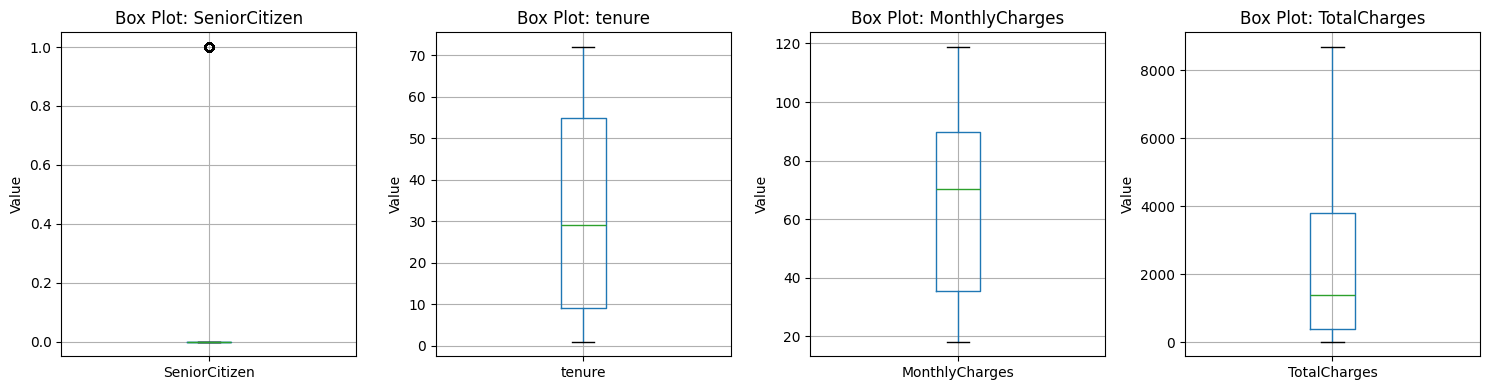

Box plots generated to visualize potential outliers.


In [51]:
# Visualize outliers with box plots
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 4))

for idx, col in enumerate(numerical_cols):
    if len(numerical_cols) == 1:
        ax = axes
    else:
        ax = axes[idx]
    
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'Box Plot: {col}')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

print("Box plots generated to visualize potential outliers.")


In [52]:
# Decision on outliers
print("Outlier Assessment:")
print("="*80)
print("""
For this customer churn dataset, the 'outliers' detected are likely legitimate values:
- tenure: Long-term customers (high values) are valid and important for analysis
- MonthlyCharges: High charges represent premium service customers
- TotalCharges: High values represent long-term or high-paying customers

These outliers are meaningful for predicting churn, so we will KEEP them.
No outlier removal is necessary for this dataset.
""")

print(f"\nFinal dataset shape after cleaning: {df.shape}")


Outlier Assessment:

For this customer churn dataset, the 'outliers' detected are likely legitimate values:
- tenure: Long-term customers (high values) are valid and important for analysis
- MonthlyCharges: High charges represent premium service customers
- TotalCharges: High values represent long-term or high-paying customers

These outliers are meaningful for predicting churn, so we will KEEP them.
No outlier removal is necessary for this dataset.


Final dataset shape after cleaning: (7032, 21)


In [53]:
# Verify Contract and Churn columns for logistic regression
print("Verification for Logistic Regression Analysis:")
print("="*80)
print("\nContract Type Distribution:")
print(df['Contract'].value_counts())
print(f"\nContract Type Percentages:")
print(df['Contract'].value_counts(normalize=True) * 100)

print("\n" + "="*80)
print("Churn Distribution:")
print(df['Churn'].value_counts())
print(f"\nChurn Percentages:")
print(df['Churn'].value_counts(normalize=True) * 100)


Verification for Logistic Regression Analysis:

Contract Type Distribution:
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

Contract Type Percentages:
Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: proportion, dtype: float64

Churn Distribution:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn Percentages:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [54]:
# Cross-tabulation of Contract Type and Churn
print("Cross-tabulation: Contract Type vs Churn")
print("="*80)
crosstab = pd.crosstab(df['Contract'], df['Churn'], margins=True)
print(crosstab)

print("\n" + "="*80)
print("Churn Rate by Contract Type:")
churn_by_contract = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(churn_by_contract)


Cross-tabulation: Contract Type vs Churn
Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1306   166  1472
Two year        1637    48  1685
All             5163  1869  7032

Churn Rate by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


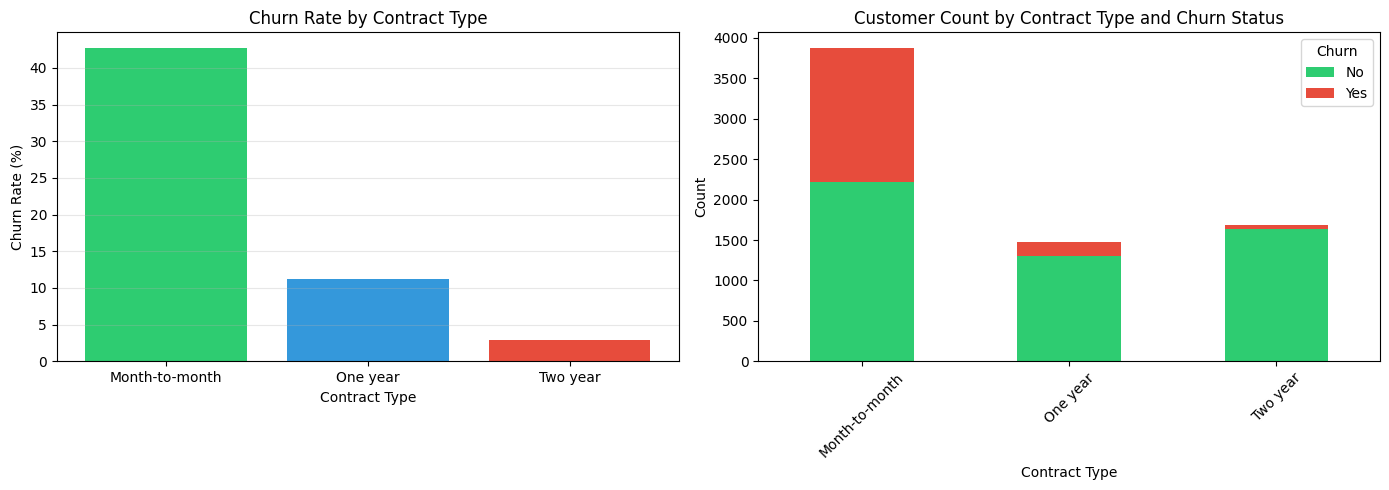

In [55]:
# Visualize Contract Type vs Churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of churn rate by contract type
churn_rate = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
axes[0].bar(churn_rate.index, churn_rate.values, color=['#2ecc71', '#3498db', '#e74c3c'])
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_title('Churn Rate by Contract Type')
axes[0].grid(axis='y', alpha=0.3)

# Stacked bar chart
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', stacked=True, ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Count')
axes[1].set_title('Customer Count by Contract Type and Churn Status')
axes[1].legend(title='Churn', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [56]:
# Save the cleaned dataset
output_filename = 'telco_customer_churn_cleaned.csv'
df.to_csv(output_filename, index=False)


In [57]:
# Final cleaned dataset preview
print("Final Cleaned Dataset Info:")
print("="*80)
print(df.info())
print("\n" + "="*80)
print("\nFirst 5 rows of cleaned data:")
print(df.head())
print("\n" + "="*80)
print("\nLast 5 rows of cleaned data:")
print(df.tail())


Final Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7